## Test

# DFT

Importing important libarys and implementing DFT function 

In [25]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

#DFT 
def dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

# .wav-file

Importing .wav-file and printing length of the vector and sample rate

Vector containing air pressure differences at different (discrete) time steps
Sample rate says how many samples per second the .wav-file contains (normally 44100)

In [26]:

sample_rate, wav_data = wavfile.read('Pistole1.wav')
print(len(wav_data))
print(sample_rate)


16960
44100


/var/folders/bc/915hg_gd3k57dw1g753wc4vr0000gn/T/ipykernel_86612/61532016.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, wav_data = wavfile.read('Pistole1.wav')


# Fourier transformation

performing DFT on wav-Vector. 
dft_result contains "frequencies" ( = periodic functions with given frequency) and quantity of frequence in measured signal

Frage: Eindeutigkeit? Ist DFT Isomorphismus? 

In [27]:
dft_result = dft(wav_data)
print(dft_result)

[[-1990656.              +0.j                0.              +0.j        ]
 [-2950091.17237771-1017918.08961669j        0.              +0.j        ]
 [ 3423072.73778375+1304488.02381489j        0.              +0.j        ]
 ...
 [ 1865515.55275303+3459094.49043735j        0.              +0.j        ]
 [ 3423072.73778996-1304488.02379903j        0.              +0.j        ]
 [-2950091.17238563+1017918.08961067j        0.              +0.j        ]]


# Frequenzen für die x-Achse

Determining occuring frequencies

Frage: Was genau macht fftfreq? 

In [28]:
n = len(wav_data)
freqs = np.fft.fftfreq(n)
print(freqs) 

[ 0.00000000e+00  5.89622642e-05  1.17924528e-04 ... -1.76886792e-04
 -1.17924528e-04 -5.89622642e-05]


# Plot

Creating plot with amplitude of frequencies

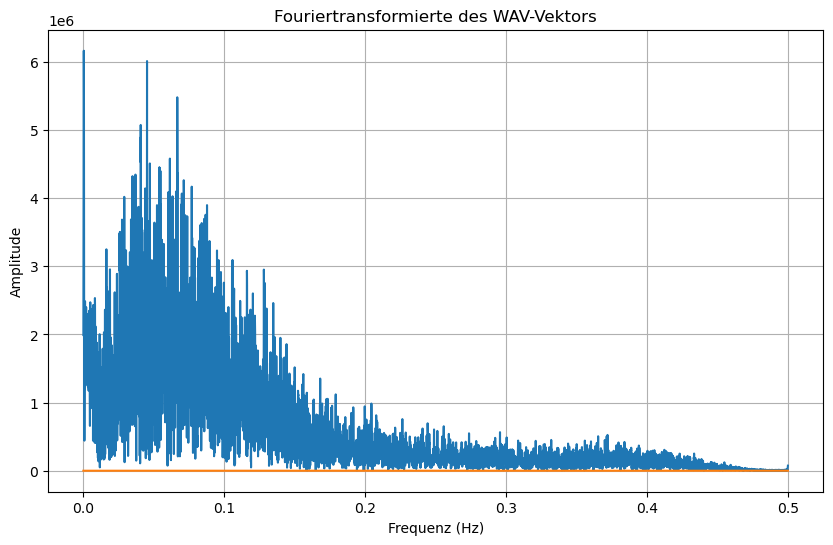

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(freqs[:n//2], np.abs(dft_result)[:n//2])  # Nur die positive Frequenzhälfte
plt.title('Fouriertransformierte des WAV-Vektors')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()